In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# The digits dataset

data shape: (1797, 64)
images shape: (1797, 8, 8)
classes shape: (1797,)
classes: [0 1 2 3 4 5 6 7 8 9]


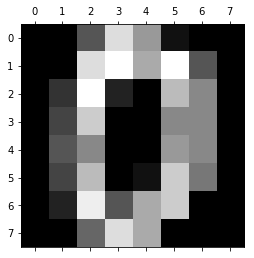

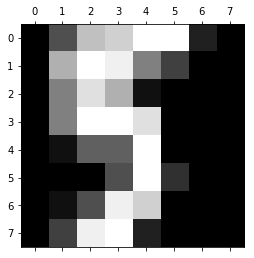

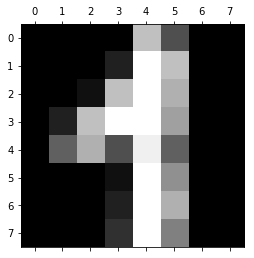

In [2]:
%matplotlib inline
digits = datasets.load_digits()
print("data shape:", digits.data.shape)
print("images shape:", digits.images.shape)
print("classes shape:", digits.target.shape)
print("classes:", digits.target_names)

Xtrain = digits.data[:1000,:]
ytrain = digits.target[:1000]
Xtest = digits.data[1000:,:]
ytest = digits.target[1000:]

plt.gray()
plt.matshow(digits.images[0])
plt.show()
plt.matshow(digits.images[15]) 
plt.show()
plt.matshow(digits.images[42]) 
plt.show()

In [3]:
print(Xtrain.shape)
print(ytrain.shape)
digitSVC = svm.SVC(kernel='rbf',gamma=0.001)
digitSVC.fit(Xtrain,ytrain)
prediction = digitSVC.predict(Xtrain)
print("Training error:", np.sum(np.not_equal(prediction,ytrain))/len(ytrain) )
prediction = digitSVC.predict(Xtest)
print("Generalization error:", np.sum(np.not_equal(prediction,ytest))/len(ytest) )

(1000, 64)
(1000,)
Training error: 0.001
Generalization error: 0.030112923463


In [4]:
digitRF = RandomForestClassifier(n_estimators=300, criterion='entropy')
digitRF.fit(Xtrain,ytrain)
prediction = digitSVC.predict(Xtrain)
print("Training error:", np.sum(np.not_equal(prediction,ytrain))/len(ytrain) )
prediction = digitRF.predict(Xtest)
print("Generalization error:", np.sum(np.not_equal(prediction,ytest))/len(ytest) )

Training error: 0.001
Generalization error: 0.069008782936


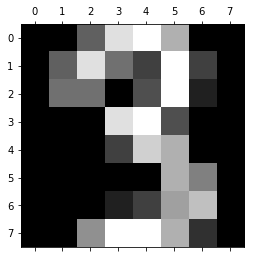

SVM prediction on image number 1052 : [3]
RF  prediction on image number 1052 : [3]
correct label                       : 3


In [5]:
# Examples
N = 1052
plt.matshow(digits.images[N]) 
plt.show() 
x = digits.data[N,:]
print("SVM prediction on image number", N, ":", digitSVC.predict([digits.data[N,:]]))
print("RF  prediction on image number", N, ":", digitRF.predict([digits.data[N,:]]))
print("correct label                       :", digits.target[N])

In [6]:
# Find misclassified examples
misclass = np.not_equal(digitRF.predict(Xtest), ytest)
Itest = digits.images[1000:,:]
Xmisclass = Xtest[misclass,:]
ymisclass = ytest[misclass]
Imisclass = Itest[misclass,:]

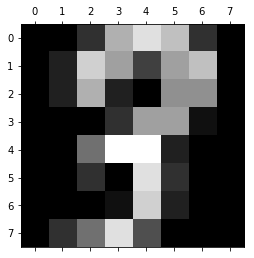

SVM prediction on image number 5 : [7]
RF  prediction on image number 5 : [7]
correct label                    : 3


In [7]:
# Display misclassified examples
N = 5
plt.matshow(Imisclass[N]) 
plt.show() 
print("SVM prediction on image number", N, ":", digitSVC.predict([Xmisclass[N,:]]))
print("RF  prediction on image number", N, ":", digitRF.predict([Xmisclass[N,:]]))
print("correct label                    :", ymisclass[N])